# Making Your Neural Networks More Accurate

Tips and best practices for increasing accuracy in models you have a V1 for. 

## Finding the Best Pre-Trained Model

Jeremy Howard has a great chart which breaks down the top [Pytorch Image Model Architectures](https://www.kaggle.com/code/jhoward/which-image-models-are-best) which you can use to identify the best model for your needs. 

On the chart you'll notice that the resnet family (specifically resnet18 and resnet34) are not the most accurate on the ImageNet dataset but they're incredibly fast which allows for quick iteration speed with your models. The most important thing to do with your V1 is to get it trained and predicting as quickly as possible so that you can immediately start identifying improvements; hence the use of Resnet models. 

Ideally, once you find a family of models that seems to work really well on your problem, you can start to get even more specific and choose versions (maybe you need something faster or more accurate).

Below is an example of you can use the timm library to find a list of all models from a particular family

In [3]:
%pip install fastbook
%pip install timm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
from fastai.vision.all import *
from fastbook import *
import timm

In [5]:
timm.list_models('resnet*')

['resnet10t',
 'resnet14t',
 'resnet18',
 'resnet18d',
 'resnet26',
 'resnet26d',
 'resnet26t',
 'resnet32ts',
 'resnet33ts',
 'resnet34',
 'resnet34d',
 'resnet50',
 'resnet50_gn',
 'resnet50c',
 'resnet50d',
 'resnet50s',
 'resnet50t',
 'resnet51q',
 'resnet61q',
 'resnet101',
 'resnet101c',
 'resnet101d',
 'resnet101s',
 'resnet152',
 'resnet152c',
 'resnet152d',
 'resnet152s',
 'resnet200',
 'resnet200d',
 'resnetaa34d',
 'resnetaa50',
 'resnetaa50d',
 'resnetaa101d',
 'resnetblur18',
 'resnetblur50',
 'resnetblur50d',
 'resnetblur101d',
 'resnetrs50',
 'resnetrs101',
 'resnetrs152',
 'resnetrs200',
 'resnetrs270',
 'resnetrs350',
 'resnetrs420',
 'resnetv2_50',
 'resnetv2_50d',
 'resnetv2_50d_evos',
 'resnetv2_50d_frn',
 'resnetv2_50d_gn',
 'resnetv2_50t',
 'resnetv2_50x1_bit',
 'resnetv2_50x3_bit',
 'resnetv2_101',
 'resnetv2_101d',
 'resnetv2_101x1_bit',
 'resnetv2_101x3_bit',
 'resnetv2_152',
 'resnetv2_152d',
 'resnetv2_152x2_bit',
 'resnetv2_152x4_bit']

**Note:** *If the model you're using is from timm and not fastai, you have to pass it to your learner as a* **string** *instead of a variable. Something like the below*

In [6]:
# learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()

# Neural Network Foundations

Understanding how a neural network functions from first-principles.

## What's Inside an Image Model?

You can use fastai to see the exact architecture of your image model, breaking down all of the layers within the image model you're using.


In [7]:
learner = load_learner('export.pkl')

learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

You can then view the parameters of a specific layer within this architecture

In [8]:
l = learner.model.get_submodule('0.4.0.conv1') # (0): Sequential --> (4): Sequential --> (0): BasicBlock --> (conv1):
list(l.parameters())

[Parameter containing:
 tensor([[[[ 5.7556e-02, -9.5150e-02, -2.0274e-02],
           [-7.4585e-02, -7.9932e-01, -2.1283e-01],
           [ 6.5546e-02, -9.6568e-02, -1.2133e-02]],
 
          [[-7.0224e-03,  1.4234e-02,  5.5583e-04],
           [ 4.1227e-02, -1.6126e-01, -2.3190e-02],
           [ 3.2681e-03,  7.1688e-03,  7.1697e-02]],
 
          [[-2.3627e-09, -3.9270e-08, -3.2971e-08],
           [ 2.1737e-08,  8.3299e-09,  1.2543e-08],
           [ 1.1381e-08,  8.8095e-09,  1.5506e-08]],
 
          ...,
 
          [[-3.6952e-02,  1.8222e-02, -2.9359e-02],
           [-9.8648e-02, -4.3698e-02, -5.2732e-02],
           [-7.9676e-02,  2.9345e-02,  4.1227e-03]],
 
          [[ 1.6907e-02,  1.3949e-02,  9.6569e-03],
           [ 1.4261e-02, -6.9834e-04, -2.2093e-02],
           [ 1.2377e-02,  3.5445e-02, -2.2320e-02]],
 
          [[-2.2644e-02, -2.5352e-02, -2.3525e-02],
           [ 6.0842e-02, -9.6794e-02,  2.4092e-02],
           [-1.2772e-02,  9.2238e-02,  4.0385e-03]]],
 
 
   

## Fitting a Function to Data

We can create a simple quadratic function and use that as an example to model how most neural network functions work.

In essence, machine learning models are things that fit functions to data, so we can demonstrate that with something as easy as a quadratic and some random noise data. 

In [9]:
plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

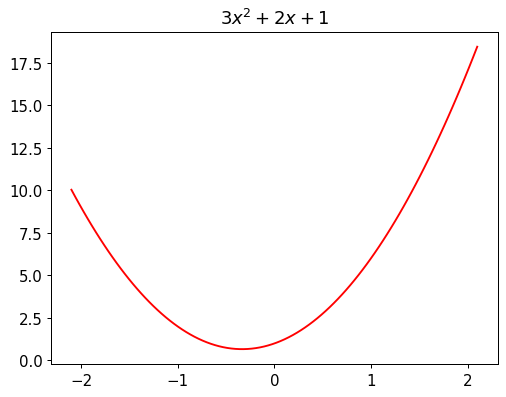

In [10]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$") # $ around a part of a string tells Python to convert to LaTeX

In [11]:
# We can write a function to make any type of quadratic

def quad(a, b, c, x): return a*x**2 + b*x + c

quad(3, 2, 1, 1.5)

10.75

In [12]:
# The parameters a, b, c and see can be fixed by using a partial function

def mk_quad(a, b, c): return partial(quad, a, b, c)

f = mk_quad(3, 2, 1)

f(1.5)

10.75

Just to quickly highlight on the `partial()` function - this is not something I'd seen before and it's pretty cool. 

The `partial()` function is a **higher order function** (meaning it can take a function as a parameter) which given a function as it's first parameter, lets you add in as many of the next parameters of that function as you'd like. In the example above, we use this to feed in the first three parameters of `quad()`, which are `a`, `b`, `c`. This leaves the `x` parameter left to fill. 

What's being return by `mk_quad` is a function that requires the final parameter of `quad()`, which is `x`. So, after passing in `x` (in the example above we passed 1.5), the `quad()` function will be executed not that it has all it's parameters.

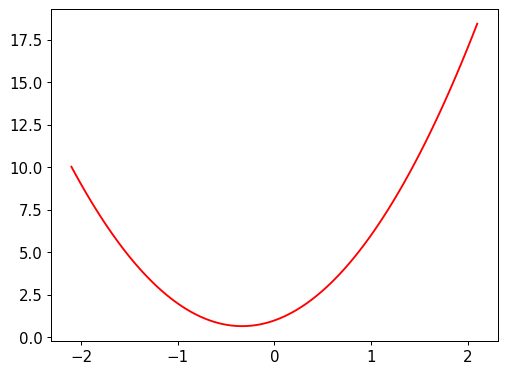

In [13]:
# If we plot f we get the same 3x^2 + 2x + 1 function 

plot_function(f)

It's important to know that in machine learning models, the data is never going to exactly match the neural network (the function) - otherwise we'd have 100% accuracy in all models.

To simulate this concentrate in our quadratic example, we can generate some noise data that won't fit our quadratic perfectly well. This will be key in showing how we need to optimize the function parameters to match the data as closely as possible.  

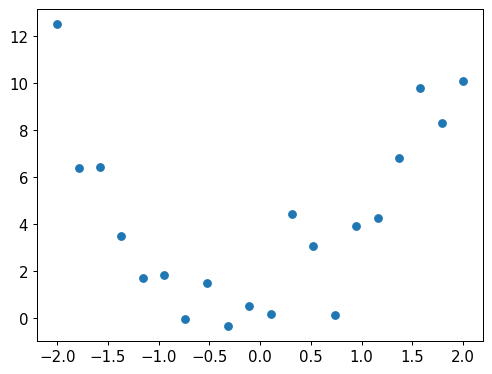

In [14]:
# Adding noise

from numpy.random import normal, seed, uniform
np.random.seed(42)
def noise(x, scale): return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1 + noise(x, mult)) + noise(x, add)

x = torch.linspace(-2, 2, steps=20)[:, None]
y = add_noise(f(x), 0.3, 1.5)
plt.scatter(x, y)

Let's examine our original quadratic on top of this scatter plot and play around with the parameters `a`, `b`, `c` a bit to see how changing parameters changes the fit on the data (based on what we can visually see and interpret).

Using `@interact()` is helpful in this. If you add it on top of any function in a Jupyter Notebook, it'll run the function and allow you to adjust the parameters through the ipywidget while seeing the changes it makes to the output.

In [15]:
from ipywidgets import interact

@interact(a=3.0, b=2.0, c=1.0)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))

interactive(children=(FloatSlider(value=3.0, description='a', max=9.0, min=-3.0), FloatSlider(value=2.0, descr…

This gives us a good understanding of how we can automate this process of adjusting and finding the curve of best fit for our data. You need to:

1. Have a metric to judge whether or not the function is actually fitting better on the data - **loss**
2. Make automatic adjustments to the parameter in accordance with the feedback from the parameter 

We'll implement MSE (mean-squared error) as our **loss** function - the metric that will judge the fit of the function. As it's name suggests, we'll take the delta between our 'prediction' (the y-values of the curve) and the 'actual' (the y-values that are plotted).

Of course, because there are multiple y-values, the `preds` and `acts` parameters are NumPy arrays. 

In [16]:
def mse(preds, acts): return ((preds-acts)**2).mean()

In [17]:
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a, b, c):
    f = mk_quad(a, b, c) # Make our f(x) function
    plt.scatter(x, y) # Plot the noise data
    loss = mse(f(x), y) # Compute the loss
    plot_function(f, title=f"MSE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

Although it may not be visible on the GitHub, the values of my a, b, and c parameters in the first execution (w/o loss function) and the second execution (w/ loss function) were drastically different. This is because after a minor adjust to each of the parameters in the correct direction, I was able to evaluate the impact on the loss and go back and do another small adjustment, and continually repeat that process until I got the smallest loss possible.